<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter5_NeuralNetwork/Section5.3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 5.3 - Convolutional Neural Network

This notebook contains all demo codes in Section 5.3.

The goal of this session is to help you 

1. understand how to use CNN for the image classification;
2. implement CNN to empirical datasets using Keras;
3. fine tune your CNN models to achieve better performance.


![alt text](https://docs.google.com/uc?export=download&id=1oXzt8ryDo_gkzI_78jXLvSkx7qLdqqb-)



## Image Classification using Convolutional Neural Networks (CNN)

1. **Dataset**: $\mathcal{D} = (X_i, Y_i)_{i=1}^{N}$,
where 
 * Input: Image Data $X$ with dimension (width, height, depth = 3).

 * Output: Objects in images $Y$ (represented in one hot vector). 

2. **CNN Model**: $f_{\theta}(X, Y) = P(Y\vert X)$.

 * Input Layer: Image Data (3D tensor - (width, height, depth))

 *  Ouput Layer: A vector of the length being the number of classes (no of classes, 10). 

 * Building blocks of CNNs
 
        (1) Convolutional Layer;
 
        (2) Pooling Layer;
 
        (3) Fully connected (Dense) Layer. 


3. ** Loss Function**: 
\begin{eqnarray*}
L(\theta \vert \mathcal{D})  = - \frac{1}{N}\sum_{i=1}^{N}\log P(Y_{i}\vert X_{i}) = - \frac{1}{N} \sum_{i = 1}^{N}\langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle, .
\end{eqnarray*}

  where $y_i$ is a one-hot vector.  

4. ** Optimization**: 
\begin{eqnarray*}
\theta^{*} = \arg\min_{\theta} L(\theta \vert \mathcal{D}) .
\end{eqnarray*}

5. ** Prediction**: 

\begin{eqnarray*}
\hat{Y}_{new} = \arg\max_{y} f_{\theta^{*}}  (X_{new}, y) .
\end{eqnarray*}

6. **Test and Validation**:  e.g. the accuracy of the estimated model, i.e.

\begin{eqnarray*}
\frac{\sum_{i=1}^{N}1(Y_{i} == \hat{Y}_{i})}{N}.
\end{eqnarray*}


## Pre-process Cifar10 Dataset

In [0]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical

# Import Cifar10 dataset
(x_cifar10_train, y_cifar10_train), (x_cifar10_test, y_cifar10_test) = cifar10.load_data()

# Normalize the input data
x_train = x_cifar10_train.astype('float32')
x_test = x_cifar10_test.astype('float32')
x_train /= np.amax(x_train)
x_test /= np.amax(x_train)

# Convert class vectors to one-hot vector matrices
num_classes = 10
y_train = to_categorical(y_cifar10_train, num_classes)
y_test = to_categorical(y_cifar10_test, num_classes)


##Implement CNN for Classification Using Lenet Architecture

**LeNet CNN Model Architecture**

![alt text](https://docs.google.com/uc?export=download&id=175hXfs1m6v3e3NRVoKN7b51aSxe06xNA)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
import time

# Build the first LeNet model
def Lenet_Model_BaseLine(n_hidden_neurons):
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    # Add two convolutional layers and pooling layers in turn
    model.add(Conv2D(n_hidden_neurons, (3, 3), input_shape=(32,32,3), activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3,3), activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Convert the input into a vector
    model.add(Flatten())
    model.add(Dense(512, activation ='relu'))
    model.add(Dense(10, activation ='softmax'))
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

n_hidden_neurons = 32
batch_size =128
epochs = 40
Lenet_Model = Lenet_Model_BaseLine(n_hidden_neurons)
print(Lenet_Model.summary())
hist_Lenet_Model= Lenet_Model.fit(x_train, y_train, epochs=epochs,  validation_data=(x_test, y_test), verbose=1)


Compiling Model ... 
Model compield in 0.21465563774108887 seconds
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dense_8 (

In [0]:
score = Lenet_Model.evaluate(x_test, y_test)
print(Lenet_Model.metrics_names)
print('Test ' + Lenet_Model.metrics_names[0] , score[0])
print('Test '+ Lenet_Model.metrics_names[1] , score[1])

10000/10000 [==============================] - 1s 68us/step
['loss', 'acc']
Test loss 7.077947092437745
Test acc 0.5595


##Plot the Fitting Result

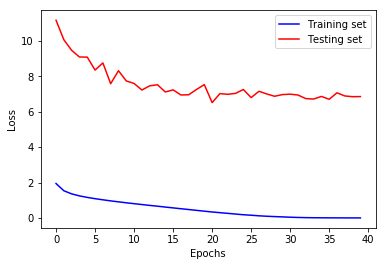

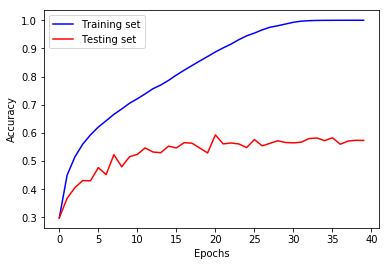

In [0]:
from matplotlib import pyplot as plt    

# Define functions to plot the loss and accuracy
def plot_hist_loss(hist):
  plt.figure()
  plt.plot(hist.history['loss'], 'b', linewidth=1.5)
  plt.plot(hist.history['val_loss'], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  
def plot_hist_accuracy(hist):
  plt.figure()
  plt.plot(hist.history['acc'], 'b', linewidth = 1.5)
  plt.plot(hist.history['val_acc'], 'r', linewidth = 1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')


plot_hist_loss(hist_Lenet_Model)
plot_hist_accuracy(hist_Lenet_Model)

##Some tips to train the CNN model

The overfitting issue might occur when applying very sophisocated CNN or other deep learning models. There are several popular ways to deal with the overfitting issue.

1. Dropout
2. Data Augmentation
3. Weight regularization


##Dropout




Compiling Model ... 
Model compield in 0.17827796936035156 seconds
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2

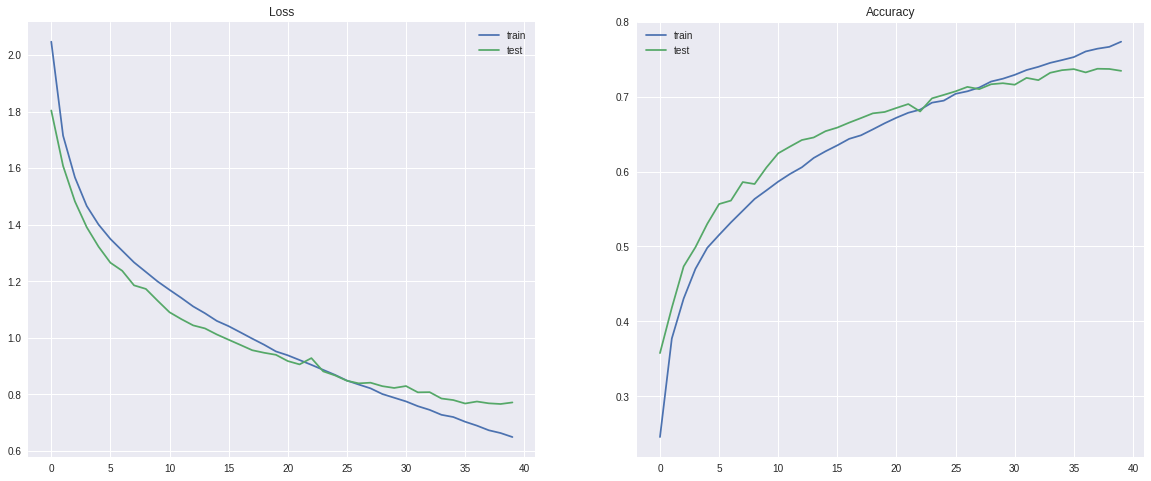

In [0]:
def Lenet_Model_Dropout(n_hidden_neurons, dropout_rate):
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Conv2D(n_hidden_neurons, (3, 3), input_shape=(32,32, 3),activation = 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
 
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation = 'softmax'))
    
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

dropout_rate = 0.25
Lenet_dropout_Model = Lenet_Model_Dropout(n_hidden_neurons,dropout_rate)
print(Lenet_dropout_Model.summary())
hist_Lenet_dropout_Model= Lenet_dropout_Model.fit(x_train, y_train, epochs=epochs,  validation_data=(x_test, y_test), verbose=1)
plot_hist(hist_Lenet_dropout_Model)
  

Grid Search to find optimal dropout rate 

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# create model
model = KerasClassifier(build_fn=Lenet_Model_Dropout, n_hidden_neurons=32,  epochs=40, batch_size=128, verbose=0)
# define the grid search parameters
dropout_rate = [0.1, 0.25, 0.5]
param_grid = dict(dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Compiling Model ... 
Model compield in 0.24458956718444824 seconds
Compiling Model ... 
Model compield in 0.1613445281982422 seconds
Compiling Model ... 
Model compield in 0.16333985328674316 seconds
Compiling Model ... 
Model compield in 0.1809089183807373 seconds
Compiling Model ... 
Model compield in 0.16315674781799316 seconds
Compiling Model ... 
Model compield in 0.16624188423156738 seconds
Compiling Model ... 
Model compield in 0.16211271286010742 seconds
Compiling Model ... 
Model compield in 0.17762279510498047 seconds
Compiling Model ... 
Model compield in 0.16598224639892578 seconds
Compiling Model ... 
Model compield in 0.16199636459350586 seconds
Best: 0.617820 using {'dropout_rate': 0.1}
0.617820 (0.002970) with: {'dropout_rate': 0.1}
0.584000 (0.003144) with: {'dropout_rate': 0.25}
0.523300 (0.010356) with: {'dropout_rate': 0.5}


##Data Augumentation###

[Image Augmentation for Deep Learning With Keras](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/)

Using real-time data augmentation.
Compiling Model ... 
Model compield in 0.1175694465637207 seconds
Epoch 1/160
391/391 [==============================] - 30s 77ms/step - loss: 2.2452 - acc: 0.1701 - val_loss: 2.1170 - val_acc: 0.2556
Epoch 2/160
391/391 [==============================] - 29s 75ms/step - loss: 2.0263 - acc: 0.2703 - val_loss: 1.9378 - val_acc: 0.3130
Epoch 3/160
391/391 [==============================] - 29s 75ms/step - loss: 1.9409 - acc: 0.3086 - val_loss: 1.8587 - val_acc: 0.3514
Epoch 4/160
391/391 [==============================] - 30s 76ms/step - loss: 1.8676 - acc: 0.3365 - val_loss: 1.7709 - val_acc: 0.3774
Epoch 5/160
391/391 [==============================] - 29s 74ms/step - loss: 1.7771 - acc: 0.3715 - val_loss: 1.6647 - val_acc: 0.4112
Epoch 6/160
391/391 [==============================] - 29s 73ms/step - loss: 1.6894 - acc: 0.3961 - val_loss: 1.5696 - val_acc: 0.4429
Epoch 7/160
391/391 [==============================] - 29s 74ms/step - loss: 1.6282 - acc

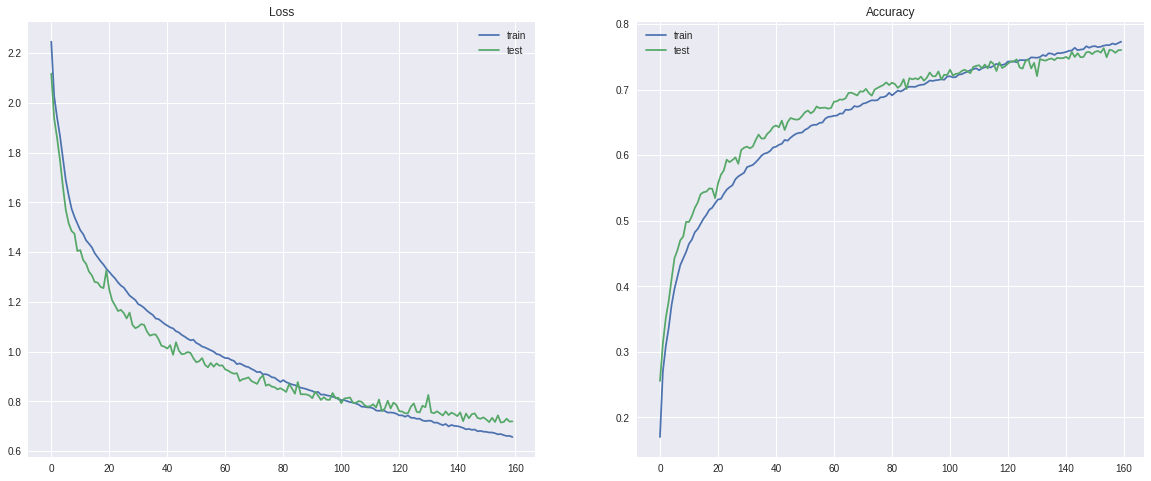

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.callbacks import LearningRateScheduler, TensorBoard

from keras.models import load_model

iterations    = 391
epochs = 160
# set callback
#tb_cb = TensorBoard(log_dir='./lenet_dp_da', histogram_freq=0)

#change_lr = LearningRateScheduler(scheduler)
#cbks = [change_lr,tb_cb]

# using real-time data augmentation
print('Using real-time data augmentation.')
datagen = ImageDataGenerator(horizontal_flip=True,
            width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)

datagen.fit(x_train)

# start train 
Lenet_da_Model  = Lenet_Model_BaseLine(n_hidden_neurons)

hist_Lenet_da = Lenet_da_Model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                        steps_per_epoch=iterations,
                        epochs=epochs,
                        validation_data=(x_test, y_test))
plot_hist(hist_Lenet_da )




##Weight Regularization ###

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers

def Lenet_Model_WeightRegularization (regRate):
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),activation = 'relu', kernel_regularizer=regularizers.l1(regRate)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_regularizer=regularizers.l1(regRate)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, kernel_regularizer=regularizers.l1(regRate), activation = 'relu'))
    model.add(Dense(10, activation ='softmax'))
   
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model
  
model = KerasClassifier(build_fn=Lenet_Model_WeightRegularization, epochs = 40, batch_size=128)

param_grid = dict(regRate = [0, 0.001, 0.002])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Compiling Model ... 
Model compield in 0.11581802368164062 seconds
Epoch 1/40
33333/33333 [==============================] - 5s 152us/step - loss: 2.2495 - acc: 0.1904
Epoch 2/40
33333/33333 [==============================] - 5s 139us/step - loss: 2.0178 - acc: 0.2852
Epoch 3/40
33333/33333 [==============================] - 5s 139us/step - loss: 1.8914 - acc: 0.3284
Epoch 4/40
33333/33333 [==============================] - 5s 138us/step - loss: 1.8051 - acc: 0.3633
Epoch 5/40
33333/33333 [==============================] - 5s 137us/step - loss: 1.7154 - acc: 0.3949
Epoch 6/40
33333/33333 [==============================] - 5s 139us/step - loss: 1.6253 - acc: 0.4254
Epoch 7/40
33333/33333 [==============================] - 5s 138us/step - loss: 1.5462 - acc: 0.4543
Epoch 8/40
33333/33333 [==============================] - 5s 138us/step - loss: 1.4870 - acc: 0.4719
Epoch 9/40
33333/33333 [==============================] - 5s 138us/step - loss: 1.4402 - acc: 0.4925
Epoch 10/40
33333/33333 

Useful Link:  [How to Grid Search Hyperparameters](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)

## Other Aspects

The sucess of the optimization scheme depends on several aspects:

    Data - Normalization.
    Optimizor
    Parameter initialization


###Normalization###

[Keras link](https://keras.io/layers/normalization/)

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

In [0]:
import time
def Lenet_Model_batch_norm():
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

Compiling Model ... 
Model compield in 0.3035099506378174 seconds
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 

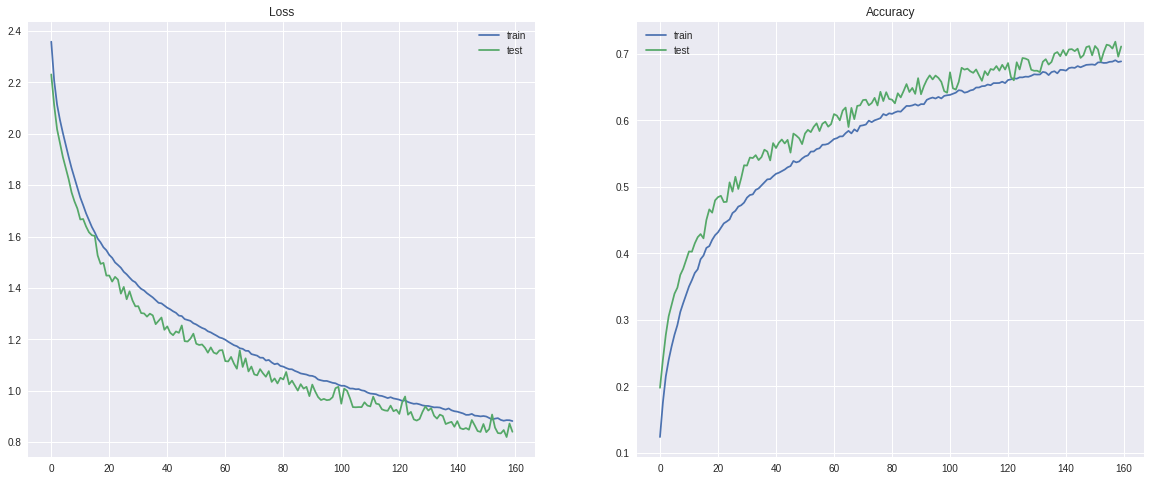

In [0]:
Lenet_Model_batch_norm1 = Lenet_Model_batch_norm()
print(Lenet_Model_batch_norm1.summary())

hist_Lenet_Model_batch_norm= Lenet_Model_batch_norm1.fit(x_cifar10_train, y_train, epochs=epochs, batch_size = 1024, validation_data=(x_cifar10_test, y_test), verbose=1)
plot_hist(hist_Lenet_Model_batch_norm)


###Optimizer###

Optimizor

   1.  Method, e.g. SGD, Adam...
   
   2. Related Parameters, .e.g batch_size, epochs...

[Keras Link](https://keras.io/optimizers/)

Popular optimazation methods include:

1.   Stochastic Grid Descent(SGD);
2.   Adaptive Gradient Algorithm (AdaGrad);
3.   Root Mean Square Propagation (RMSProp)

More information can be found in  [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).


In [0]:
from keras.optimizers import RMSprop, SGD

${\color{red}Homework}$: Use GridSearch to try out different optimization methods and choose the best one.  

###Weight initialization ###

[Keras Link](https://keras.io/initializers/)

init = ['glorot_uniform', 'normal', 'uniform']


${\color{red}Homework}$: Use GridSearch to try out different weight initialziation methods and choose the best one.  

# Future Work

[Rodrigo Benenson's Blog](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)


![alt text](https://docs.google.com/uc?export=download&id=1gbnaifDszhZ9ivWx4hWob93XGAp5o4kb)
